In [63]:
# project specific imports
import definitions
from model.model import count_net
from data_farming.helpers import csv_to_df

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

ImportError: cannot import name 'count_net' from 'model.model' (/home/alexanderjanssen/Projects/dapi_counter/model/model.py)

In [41]:
# check function
def check(image, locations, count):
    img_tmp = image[:,:,0]
    plt.imshow(img_tmp)
    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    plt.plot(x,y, 'yX')
    plt.axis('off')
    print('len(locations) == count? =>', len(locations) == count)
    assert len(locations) / 93 == count, 'The cell count and number of locations do not match'
    print('image shape:', image.shape)
    plt.show()

In [42]:
data = []
labels = []
locations = []

df = csv_to_df(definitions.PATH['CSV'])
df_shuffle = df.sample(frac=1).reset_index(drop=True)

In [43]:
for i, image in enumerate(df_shuffle['name']):
    im_path = os.path.join(definitions.PATH['IMAGE_OUT'] + image)
    img = cv2.imread(im_path)[:,:,:1]
    # shape is (256, 256, 1)
    data.append(img)
    label = df_shuffle['count'][i]
    loc = df_shuffle['locations'][i]
    labels.append(label)
    locations.append(loc)


In [44]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels) / max(labels)
locations = np.array(locations)

In [45]:
# locations atm is a nd.array containing lists, should be a 3d nd.array
# after that we can / 256 to get the relative locations of all the pixels

len(locations) == count? => True
image shape: (256, 256, 1)


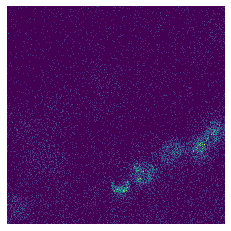

len(locations) == count? => False
image shape: (256, 256, 1)


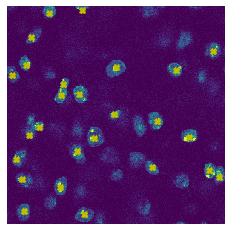

len(locations) == count? => True
image shape: (256, 256, 1)


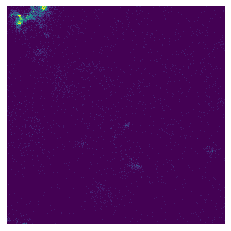

len(locations) == count? => False
image shape: (256, 256, 1)


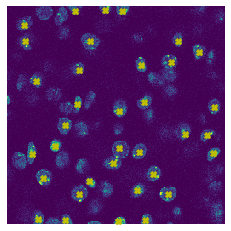

len(locations) == count? => False
image shape: (256, 256, 1)


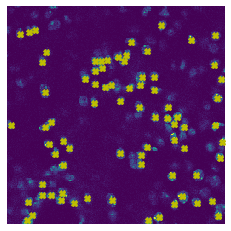

In [46]:
# check if cell count and locations are correct
for i in range(5):
    check(data[i], locations[i], labels[i])

In [47]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [48]:
opt = tf.keras.optimizers.Adam(lr=1e-4, decay=1e-4 / 200)

In [50]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
)

In [51]:
# set batch size and epochs
BS = 16
EPOCHS = 10

In [60]:
model = nn.count_net(input_tensor=None, input_shape=(256, 256, 1))

AttributeError: module 'model.model' has no attribute 'count_net'

In [49]:
model.compile(optimizer=opt, loss='mean_absolute_percentage_error')

NameError: name 'model' is not defined

In [127]:
# input a keras sequence containing dataset
print("[INFO] training network for {} epochs...".format(EPOCHS))

H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS
)

[INFO] training network for 10 epochs...
Epoch 1/10
40/40 [==============================] - 530s 13s/step - loss: 41462.8343 - val_loss: 52677.1113
Epoch 2/10
40/40 [==============================] - 518s 13s/step - loss: 24340.6015 - val_loss: 64319.0191
Epoch 3/10
40/40 [==============================] - 479s 12s/step - loss: 95713.1454 - val_loss: 22510.4703
Epoch 4/10
40/40 [==============================] - 481s 12s/step - loss: 119261.5648 - val_loss: 73587.6293
Epoch 5/10
40/40 [==============================] - 484s 12s/step - loss: 5672.1843 - val_loss: 11756.6593
Epoch 6/10
40/40 [==============================] - 537s 13s/step - loss: 8612.9808 - val_loss: 6717.9944
Epoch 7/10
40/40 [==============================] - 551s 14s/step - loss: 3026.4214 - val_loss: 513.2274
Epoch 8/10
40/40 [==============================] - 539s 13s/step - loss: 9618.4142 - val_loss: 300.2488
Epoch 9/10
40/40 [==============================] - 543s 14s/step - loss: 20328.0152 - val_loss: 8277.7

In [130]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(mean_absolute_error(testY,
    predictions) * 93)

[INFO] evaluating network...
21.40248991790604


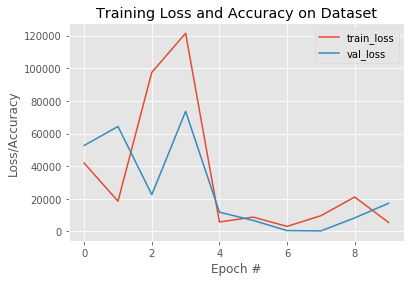

In [131]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.show()